In [1]:
import numpy as np 
import pandas as pd

In [2]:
csv_file = '~/Documents/uni/y3s1/19S1-CE4042-CZ4042-NEURAL NETWORK  DEEP LEARNING/Content/assignment1/admission_predict.csv'

df = pd.read_csv(csv_file, index_col=[0])

In [8]:
df.shape

(400, 8)

In [12]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


## Data Preperation

In [78]:
seed = 10
test_propotion = .3

np.random.seed(seed)

data = df.values
np.random.shuffle(data)

#normalization, and keep only first two decimals
data[:, :-1] = np.round((data[:, :-1] - np.mean(data[:, :-1], axis=0))/ np.std(data[:, :-1], axis=0), decimals=2)

train = data[:int(len(data)*(1-test_propotion)), :]
test = data[int(len(data)*(1-test_propotion)):, :]

X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((280, 7), (280,), (120, 7), (120,))

## Q1 Trainng

In [ ]:
import tensorflow as tf
import math
# import pylab as plt

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

NUM_FEATURES = len(X_train[0])
NUM_LABELS = 1

learning_rate = 1e-3
beta = 1e-3
epochs = 100
batch_size = 8
hidden_units = 10

idx = np.arange(X_train.shape[0])


x = tf.placeholder(tf.float32, [None, NUM_FEATURES])
y_ = tf.placeholder(tf.float32, [None, NUM_LABELS])

w1 = tf.Variable(tf.truncated_normal(
    [NUM_FEATURES, hidden_units],
    stddev=1.0 / math.sqrt(NUM_FEATURES)),
    name='weights')
b1 = tf.Variable(tf.zeros([hidden_units]),name='biases')
h1 = tf.nn.relu(tf.matmul(x, w1) + b1)

w2 = tf.Variable(tf.truncated_normal(
    [hidden_units, 1],
    stddev=1.0 / math.sqrt(hidden_units)),
    name='weights')
b2 = tf.Variable(tf.zeros([1]), name='biases')
y = tf.matmul(h1, w2) + b2


optimizer = tf.train.GradientDescentOptimizer(learning_rate)

regularization = tf.nn.l2_loss(w1) + tf.nn.l2_loss(w2)

#???
loss = tf.reduce_mean(tf.square(y_ - y) + beta*regularization ) 
train_op = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    train_err = []
    for i in range(epochs):
        np.random.shuffle(idx)
        X_train, y_train = X_train[idx], y_train[idx]
        train_op.run(feed_dict={x:X_train, y: y_train})
        err = loss.eval(feed_dict={x: X_train, y: y_train})
        print('err', err)
        train_err.append(err)

        if i % 10 == 0:
            print('iter %d: train error %g'%(i, train_err[i]))

# plot learning curves
# plt.figure(1)
# plt.plot(range(epochs), train_err)
# plt.xlabel(str(epochs) + ' iterations')
# plt.ylabel('Train Error')
# plt.show()


## Q2.Correlation Matrix

In [13]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


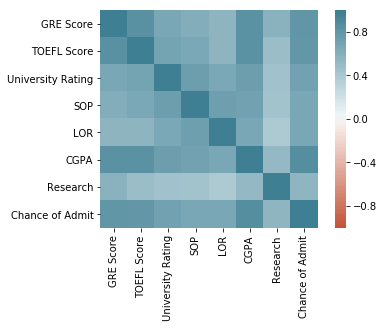

In [41]:
import seaborn as sns

corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# )

In [48]:
#Q2a
max_corr_extent=0
max_corr_index=(-1,-1)
for i in range(len(corr)):
    for j in range(i+1, len(corr)):
        if df.iloc[i,j] > max_corr_extent:
            max_corr_extent = corr.iloc[i,j]
            max_corr_index=(i,j)
            
corr.columns[max_corr_index[0]], corr.columns[max_corr_index[1]], max_corr_extent

('CGPA', 'Chance of Admit', 0.8732890993553011)

In [42]:
#Q2b
related_feature_of_admit = [(corr.columns[i], corr.iloc[-1, i]) for i in (np.argsort(corr.iloc[-1,:-1].tolist())[::-1])]
related_feature_of_admit

[('CGPA', 0.8732890993553011),
 ('GRE Score', 0.8026104595903509),
 ('TOEFL Score', 0.7915939869351035),
 ('University Rating', 0.7112502503917214),
 ('SOP', 0.6757318583886718),
 ('LOR', 0.6698887920106943),
 ('Research', 0.5532021370190388)]

## Q3 Recuisive Feature Elimination

In [34]:
df.columns[1]

'TOEFL Score'